## Latar Belakang 

### 1. Context 
California adalah salah satu pasar properti paling dinamis dan menarik di dunia. California memiliki ekonomi terbesar di Amerika Serikat dan merupakan salah satu ekonomi terkuat di dunia. beberapa sektor utama yang menjadi tulang punggung perekonomian di california adalah Teknologi, pertanian , hiburan dan media. dengan lebih dari 39 juta jiwa, permintaan akan properti baik untuk tempat tinggal maupun untuk tujuan komersial terus meningkat. tetapi juga menghadapi tantangan signifikan antara lain Kombinasi harga tinggi, peraturan ketat, dan risiko lingkungan oleh karena itu penentuan harga properti memerlukan strategi yang matang. Harga properti memiliki dampak yang signifikan terhadap kehidupan sehari-hari masyarakat, dan penting bagi masyarakat untuk memiliki tempat tinggal tetap, untuk hidup, bekerja, serta kesejahteraan dan stabilitas sosial. Oleh karena itu, memprediksi harga rumah merupakan tantangan yang besar dan bermakna


### 2. Peoblem Statement
Menentukan harga terbaik untuk suatu perumahan adalah keputusan penting yang memengaruhi keberhasilan penjualan, keuntungan, dan daya tarik bagi pembeli. Strategi penetapan harga yang efektif memerlukan keseimbangan antara keuntungan perusahaan/developer dan nilai yang dirasakan oleh pembeli. oleh karena itu, __perusahaan ingin menetapkan harga properti yang kompetitif dan menarik di pasar California dengan tetap memastikan margin keuntungan yang optimal, tetapi juga mempertimbangkan daya tarik pembeli__


### 3. Goals
Berdasarkan permasalahan tersebut, perusahaan membutuhkan tool yang dapat membantu mereka untuk memprediksi harga rumah secara akurat. fitur-fitur yang dimiliki oleh sebuah rumah seperti lokasi rumah, usia rata-rata rumah, total ruangan, total kamar tidur dan lain-lain dapat menambah keakuratan prediksi harga rumah, sehingga bisa memberikan profit yang optimal bagi perusahaan serta harga yang menarik bagi pembeli.


### 4. Analytic Approach
Melakukan analysis data untuk mengetahui hubungan antar variabel dan menemukan pola dari fitur-fitur yang ada yang mejadi pembeda suatu rumah dengan rumah yang lain. kemudian membangun machine learning yang akan menjadi tool yang digunakan perusahaan untuk memprediksi harga rumah secara akurat. yang mana akan menguntungkan untuk pihak perusahaan karena memberikan keuntungan yang optimal dan juga menguntungkan untuk pembeli karena mendapatkan harga yang fair


### 5. Metrics Evaluation
Evaluasi metrik yang akan digunakan antara lain sebagai berikut:
- __MAE__ ==> Rata-rata nilai absolut error. Memberikan gambaran tentang seberapa besar rata-rata kesalahan dalam satuan yang sama dengan target.
- __MAPE__ ==> Rata-rata persentase error absolut antara nilai aktual dan prediksi. Berguna untuk mengevaluasi performa model di berbagai skala.
- __RMSE__ ==> Akar kuadrat dari Mean Squared Error. Mengukur rata-rata error dengan penalti untuk error besar.

### Deskripsi Kolom:
- __longitude__  ==> Ukuran seberapa jauh ke barat sebuah rumah; nilai yang lebih tinggi berarti lebih jauh ke barat
- __latitude__ ==> Ukuran seberapa jauh ke utara sebuah rumah; nilai yang lebih tinggi berarti lebih jauh ke utara
- __housingMedianAge__ ==> Usia rata-rata sebuah rumah dalam satu blok; angka yang lebih rendah berarti bangunan yang lebih baru
- __totalRooms__ ==> Jumlah total kamar dalam satu blok
- __totalBedrooms__ ==> Jumlah total kamar tidur dalam satu blok
- __population__ ==> Jumlah total orang yang tinggal dalam satu blok
- __households__ ==> Jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah, untuk satu blok
- __medianIncome__ ==> Pendapatan rata-rata untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS)
- __medianHouseValue__ ==> Nilai rumah rata-rata untuk rumah tangga dalam satu blok (diukur dalam Dolar AS)
- __oceanProximity__ ==> Lokasi rumah sehubungan dengan laut/samudra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data_california_house.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52,112,28.0,193,40,1.9750,INLAND,47500
1,-122.21,37.77,43,1017,328.0,836,277,2.2604,NEAR BAY,100000
2,-118.04,33.87,17,2358,396.0,1387,364,6.2990,<1H OCEAN,285800
3,-118.28,34.06,17,2518,1196.0,3051,1000,1.7199,<1H OCEAN,175000
4,-119.81,36.73,50,772,194.0,606,167,2.2206,INLAND,59200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  int64  
 3   total_rooms         14448 non-null  int64  
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  int64  
 6   households          14448 non-null  int64  
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.1+ MB


## Data Wrangling

#### Missing value handling

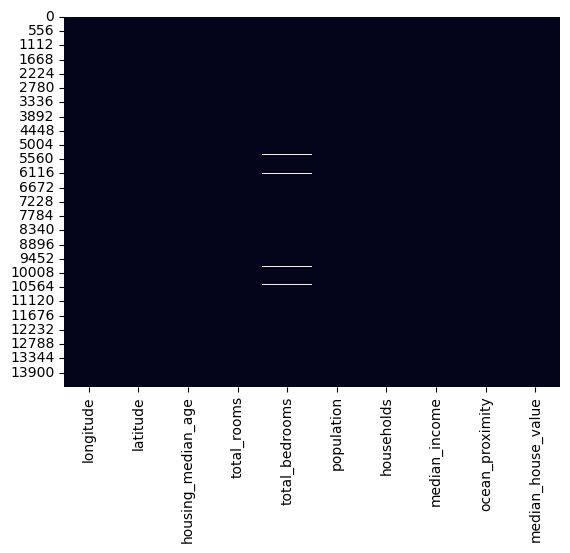

In [8]:
sns.heatmap(df.isnull(), cbar=False);

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [10]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(), #--> jumlah missing value
        round((df[i].isna().sum() / len(df)) * 100, 2)]) #--> persentase missing value


pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "type",
    "Null Val",
    "Null Percentage"])

,Data Features,type,Null Val,Null Percentage
0,longitude,float64,0,0.00
1,latitude,float64,0,0.00
2,housing_median_age,int64,0,0.00
3,total_rooms,int64,0,0.00
4,total_bedrooms,float64,137,0.95
5,population,int64,0,0.00
6,households,int64,0,0.00
7,median_income,float64,0,0.00
8,ocean_proximity,object,0,0.00
9,median_house_value,int64,0,0.00


- terdapat missing value pada kolom total_bedrooms sebanyak 137 baris atau sekitar 0.95% dari jumlah baris. jumlah missing value tergolong sedikit sehingga tratment yang dilakukan adalah dengan menghapus missing value tersebut

In [11]:
df = df.dropna()
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

#### Data Duplikat 

In [14]:
df.duplicated().sum()

0

- Tidak terdapat data duplikat pada dataframe

#### Statistika Deskriptif

In [17]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- tidak terdapat anomali. untuk longitude memang wajar jika terdapat nilai negatif karena posisi california yang berada di belahan Barat bumi(posisinya di sebelah barat Greenwich)

#### Distribusi Data Setiap kolom

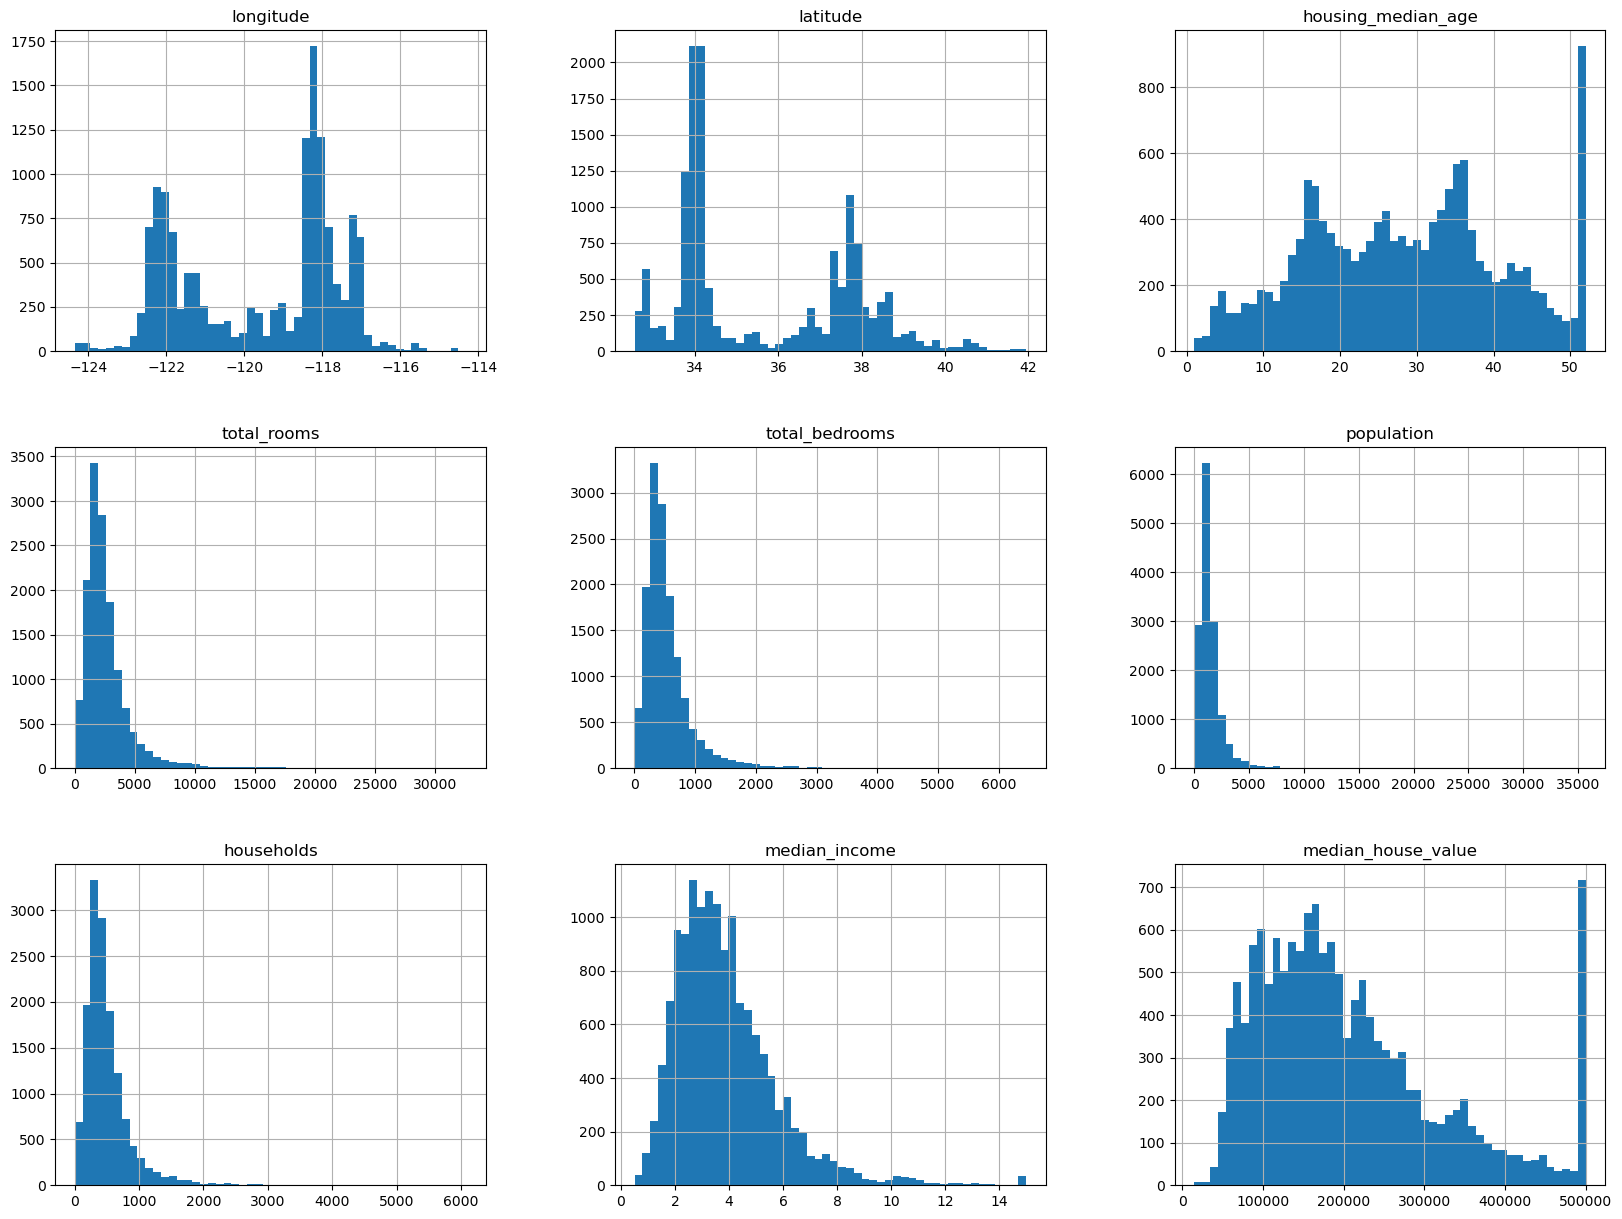

In [20]:
df.hist(bins =50,figsize=(20,15))
plt.show()

- terdapat 6 kolom yang memiliki distribusi right skew yaitu total_rooms, total_bedrooms, population, household, median_income, median_house_value. untuk kolom housing_median_age memiliki distribusi normal.

Text(0.5, 1.0, 'Lokasi rumah berdasarkan ocean_proximity')

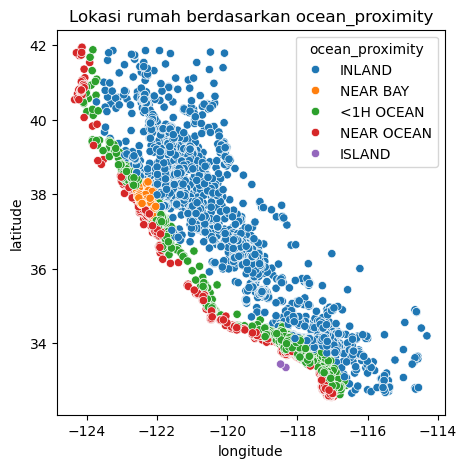

In [22]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['ocean_proximity']).set_title('Lokasi rumah berdasarkan ocean_proximity')

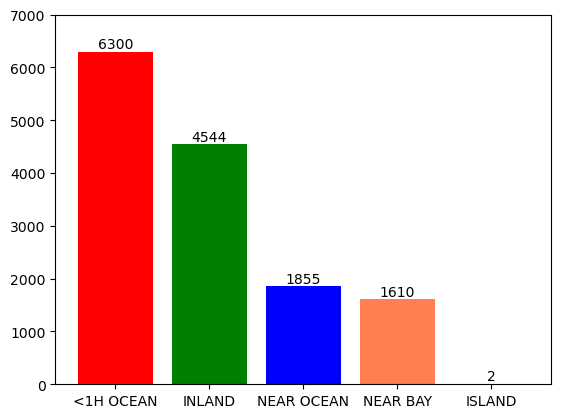

In [23]:
ocean_proximity = df['ocean_proximity'].value_counts().reset_index()
plt.bar(ocean_proximity['ocean_proximity'], ocean_proximity['count'], color=['red','green','blue','coral','yellow'])
plt.ylim(0,7000)
for i, v in enumerate(ocean_proximity['count']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

- berdasarkan grafik diatas, mayoritas perumahan berjarak kurang dari 1 jam dari laut/samudra

In [25]:
df['median_house_value'].groupby(df['ocean_proximity']).median().reset_index().sort_values('median_house_value',ascending=False)

,ocean_proximity,median_house_value
2,ISLAND,351100.0
3,NEAR BAY,230800.0
4,NEAR OCEAN,228100.0
0,<1H OCEAN,215100.0
1,INLAND,108800.0


- perumahan paling mahal adalah perumahan yang berlokasi di pulau (island). juga kita bisa menyimpulkan bahwa semakin dekat perumahan dengan laut/samudra maka semakin mahal harga rumah tersebut

#### Pengecekan Outliers

<Axes: xlabel='median_house_value'>

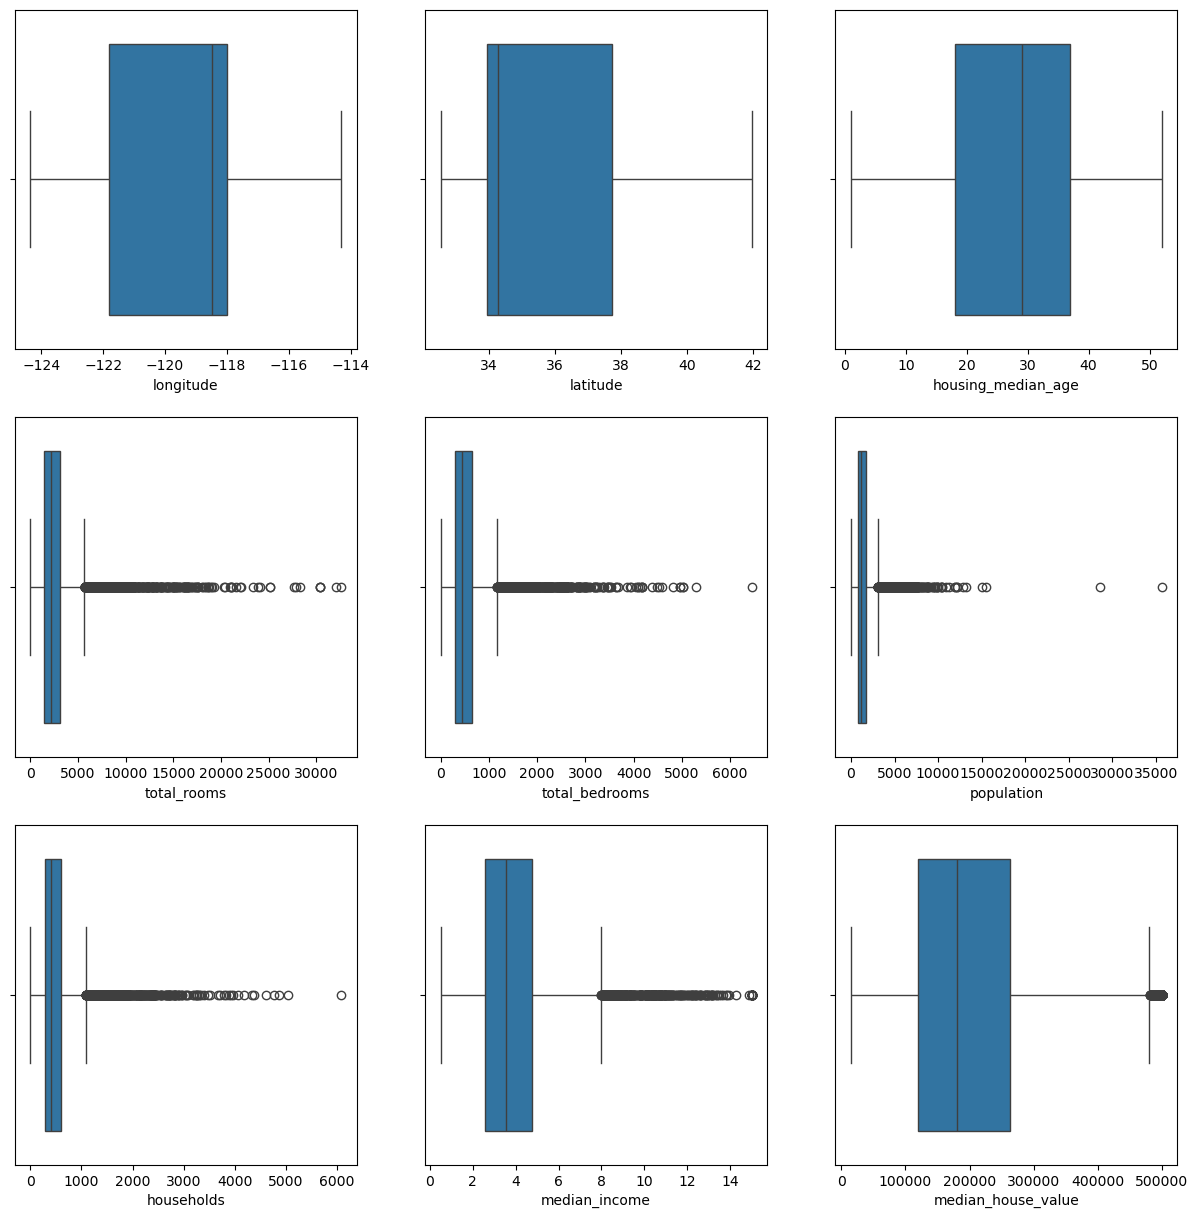

In [28]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
sns.boxplot(x='longitude',data=df,ax=axs[0,0])
sns.boxplot(x='latitude',data=df,ax=axs[0,1])
sns.boxplot(x='housing_median_age',data=df,ax=axs[0,2])
sns.boxplot(x='total_rooms',data=df,ax=axs[1,0])
sns.boxplot(x='total_bedrooms',data=df,ax=axs[1,1])
sns.boxplot(x='population',data=df,ax=axs[1,2])
sns.boxplot(x='households',data=df,ax=axs[2,0])
sns.boxplot(x='median_income',data=df,ax=axs[2,1])
sns.boxplot(x='median_house_value',data=df,ax=axs[2,2])

In [29]:
def anomali(df,kolom):
    Q1 = df[kolom].describe()['25%']
    Q3 = df[kolom].describe()['75%']
    IQR = Q3-Q1 
    upper_fance = Q3 + (1.5 * IQR)
    lower_fance = Q1 - (1.5 * IQR)
    outliers = df[(df[kolom] < lower_fance) | (df[kolom] > upper_fance)].shape[0]
    print(f'kolom : {kolom}')
    print(f'lower fance ==> {lower_fance}')
    print(f'upper fance ==> {upper_fance}')
    print(f'jumlah outliers ==> {outliers}')
    print('='*22)

In [30]:
kolom = ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
hasil = {
    'kolom' : [],
    'lower fance' : [],
    'upper fance' : [],
    'jumlah outliers' : [],
    'min' : [],
    'q1' : [],
    'q2' : [],
    'q3' : [],
    'max' : []
}
for i in kolom:
    Q1 = df[i].describe()['25%']
    Q3 = df[i].describe()['75%']
    IQR = Q3-Q1 
    upper_fance = Q3 + (1.5 * IQR)
    lower_fance = Q1 - (1.5 * IQR)
    outliers = df[(df[i] < lower_fance) | (df[i] > upper_fance)].shape[0]
    min = df[i].describe()['min']
    q1 = df[i].describe()['25%']
    q2 = df[i].describe()['50%']
    q3 = df[i].describe()['75%']
    max = df[i].describe()['max']
    hasil['kolom'].append(i)
    hasil['lower fance'].append(lower_fance)
    hasil['upper fance'].append(upper_fance)
    hasil['jumlah outliers'].append(outliers)
    hasil['min'].append(min)
    hasil['q1'].append(q1)
    hasil['q2'].append(q2)
    hasil['q3'].append(q3)
    hasil['max'].append(max)

In [31]:
pd.DataFrame(hasil)

,kolom,lower fance,upper fance,jumlah outliers,min,q1,q2,q3,max
0,housing_median_age,-10.50000,65.50000,0,1.0000,18.0000,29.0000,37.0000,52.0000
1,total_rooms,-1083.00000,5677.00000,905,2.0000,1452.0000,2125.0000,3142.0000,32627.0000
2,total_bedrooms,-233.00000,1175.00000,879,1.0000,295.0000,435.0000,647.0000,6445.0000
3,population,-623.00000,3129.00000,822,3.0000,784.0000,1164.0000,1722.0000,35682.0000
4,households,-207.75000,1090.25000,836,1.0000,279.0000,410.0000,603.5000,6082.0000
5,median_income,-0.68065,7.98615,477,0.4999,2.5694,3.5403,4.7361,15.0001
6,median_house_value,-97125.00000,480275.00000,751,14999.0000,119400.0000,180000.0000,263750.0000,500001.0000


In [32]:
df = df.drop(df[df['median_house_value'] > 480275.0 ].index)

- terdapat 6 kolom yang memiliki outliers __yaitu total_rooms__, __total_bedrooms__, ___population__, __households__, __median_income__ dan __median_house_value__. dikarenakan jumlah data yang tergolong sedikit, data outliers tidak akan di drop kecuali outliers pada kolom 'median_house_value' akan di drop dengan pertimbangan outliers tersebut akan mempengaruhi evaluasi model. dan juga jika menghapus terlalu banyak data dapat menyebabkan hilangnya informasi berharga yang justru penting untuk memahami variasi alami dalam data. menggunakan metrik evaluasi MAE & MAPE yang lebih toleran (tidak sensitif) terhadap outlier.

# Feature Engineering

In [35]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['pop_per_house'] = df['population'] / df['households']

menambahkan beberapa fitur dengan tujuan membantu memberikan informasi tambahan yang mungkin tidak langsung terlihat dalam fitur asli. Dengan fitur baru, model memiliki lebih banyak data untuk memahami hubungan antara variabel.

- rooms_per_household ==> rata-rata ruangan per rumah tangga
- bedrooms_per_room ==> rata-rata kamar tidur per rumah tangga
- pop_per_house ==> rata-rata populasi per rumah tangga

In [37]:
numeric_df = df.select_dtypes(include=[np.number])

In [38]:
numeric_df.corr('spearman').round(2).sort_values(by='median_house_value')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,pop_per_house
bedrooms_per_room,0.04,-0.10,0.18,-0.23,0.12,0.06,0.09,-0.73,-0.29,-0.88,1.00,-0.08
pop_per_house,0.18,-0.17,0.01,-0.14,-0.17,0.24,-0.14,-0.03,-0.23,0.02,-0.08,1.00
latitude,-0.88,1.00,0.04,-0.03,-0.07,-0.15,-0.09,-0.09,-0.17,0.14,-0.10,-0.17
longitude,1.00,-0.88,-0.15,0.06,0.08,0.14,0.07,0.01,-0.06,-0.03,0.04,0.18
housing_median_age,-0.15,0.04,1.00,-0.38,-0.32,-0.28,-0.30,-0.19,0.04,-0.26,0.18,0.01
population,0.14,-0.15,-0.28,0.82,0.87,1.00,0.90,0.03,0.04,-0.09,0.06,0.24
total_bedrooms,0.08,-0.07,-0.32,0.92,1.00,0.87,0.98,0.02,0.10,-0.05,0.12,-0.17
households,0.07,-0.09,-0.30,0.91,0.98,0.90,1.00,0.05,0.13,-0.10,0.09,-0.14
total_rooms,0.06,-0.03,-0.38,1.00,0.92,0.82,0.91,0.27,0.20,0.26,-0.23,-0.14
rooms_per_household,-0.03,0.14,-0.26,0.26,-0.05,-0.09,-0.10,0.62,0.21,1.00,-0.88,0.02


<Axes: >

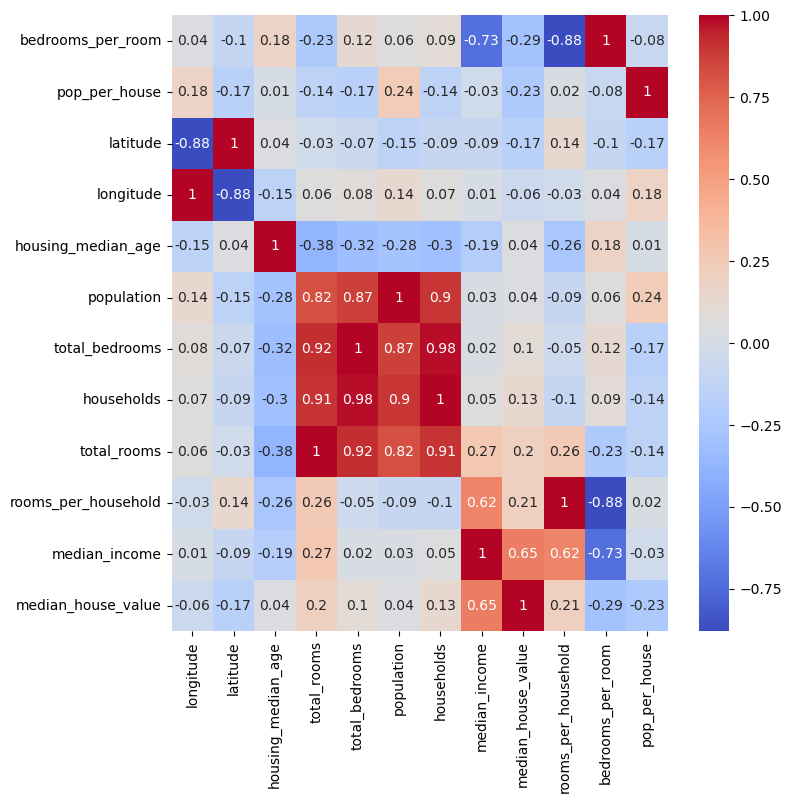

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_df.corr('spearman').round(2).sort_values(by='median_house_value'),annot=True, cmap='coolwarm')

- fitur median_income merupakan fitur yang memiliki korelasi paling kuat pada target

In [40]:
df_model = df.drop(columns=['total_rooms','total_bedrooms','population'])

- Menghapus fitur lama karena sudah ada fitur baru yang sudah menangkap informasi yang sama dengan fitur lama.hal ini dilakukan dengan tujuan agar tidak terjadi multikolinearitas. Dataset dengan terlalu banyak fitur juga dapat menyebabkan overfitting, terutama jika model sederhana atau dataset kecil.

## Modeling

In [43]:
## import library yang digunakan untuk modeling

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#### Encoding

In [45]:
transformer = ColumnTransformer(
    [
        ('OneHot',OneHotEncoder(drop='first',handle_unknown='ignore'),['ocean_proximity']),
    ], remainder='passthrough'
)

- encoding hanya dilakuakan pada fitur __'ocean_proximity'__ karena hanya fitur tersebut yang berisikan data kategorikal.

#### Data splitting

In [48]:
X = df_model.drop(columns='median_house_value')
y = df_model['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, random_state = 42)

#### Model

In [51]:
## Model yang di gunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

Ringkasan singkat model yang digunakan:
- linear regression ==> Linear Regression bekerja dengan mencari hubungan linear antara fitur dan target. Model ini mencoba untuk menemukan koefisien yang meminimalkan kesalahan prediksi, dan hasilnya bisa digunakan untuk prediksi pada data baru.
- KNeighborsRegressor ==> KNN bekerja dengan cara mencari k tetangga terdekat dari titik data yang ingin diprediksi, dan hasil prediksi adalah rata-rata atau median dari target (nilai) tetangga terdekat tersebut.
- DecisionTreeRegressor ==> Model ini bekerja dengan cara membagi data menjadi beberapa subset berdasarkan aturan yang dihasilkan oleh pohon keputusan, dan kemudian membuat prediksi berdasarkan rata-rata nilai target dari subset tersebut.
- RandomForestRegressor ==> bekerja dengan membangun banyak pohon keputusan (decision trees) dan menggabungkan prediksi dari semua pohon untuk mendapatkan hasil yang lebih stabil dan akurat. Algoritma ini termasuk dalam kategori ensemble learning, yang berarti menggunakan beberapa model untuk membuat prediksi.
-  XGBRegressor ==> XGBRegressor bekerja dengan cara membangun serangkaian pohon keputusan secara berurutan, di mana setiap pohon memperbaiki kesalahan dari pohon sebelumnya, hingga model dapat menghasilkan prediksi yang lebih akurat

In [52]:
## pemodelan dilakukan dengan skala logaritmik, kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr,func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn,func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt,func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf,func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb,func=np.log, inverse_func=np.exp)

In [53]:
## Scaler
scaler = StandardScaler()

In [54]:
# model
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

# score mae
score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

# score mape
score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# score rmse
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

# mencari model terbaik 
for i in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler',scaler),
        ('model',i)
    ]) 
    
    # mae
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
    )
    print(model_cv_mae, i)
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # mape
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
    )
    print(model_cv_mape, i)
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    # rmse
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )
    print(model_cv_rmse, i)
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

[-44711.48631163 -44169.4438491  -43970.91956761 -44582.23097344
 -44644.27264905] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.25275581 -0.2473954  -0.25012105 -0.25232152 -0.24958861] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-66044.33056083 -62815.0589977  -61702.37210781 -64009.09001613
 -70769.37734179] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-37887.80097753 -39865.19911223 -38435.99351783 -39748.82163529
 -39315.28306837] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.21230914 -0.21696128 -0.21161772 -0.22285355 -0.21528121] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                     

In [123]:
benchmark = pd.DataFrame({
    'model' : ['Linear Regression','KNN','DecisionTree','RandomForest','XGB'],
    'mean MAE' : nilai_mean_mae,
    'std MAE' : nilai_std_mae,
    'mean MAPE' : nilai_mean_mape,
    'std MAPE' : nilai_std_mape,
    'mean RMSE' : nilai_mean_rmse,
    'std RMSE' : nilai_std_rmse
})

benchmark.sort_values('mean MAE', ascending=False)

,model,mean MAE,std MAE,mean MAPE,std MAPE,mean RMSE,std RMSE
4,XGB,-28515.438082,597.245552,-0.160526,0.003394,-43232.788168,978.000456
3,RandomForest,-30219.678207,662.426873,-0.168963,0.003805,-45782.033013,625.344797
1,KNN,-39050.619662,768.242798,-0.215805,0.004026,-56353.165134,1135.246378
2,DecisionTree,-43260.711856,264.082116,-0.247769,0.006296,-64213.583278,483.498010
0,Linear Regression,-44415.670670,291.869589,-0.250436,0.001949,-65068.045805,3193.224376


data frame diatas menunjukkan score hasil bencmarking pada kelima model.

RMSE: 
- Model dengan nilai RMSE paling bagus adalah XGB dengan nilai RMSE -43232.788168
- Model lain yang mendekati adalah RandomForest dengan selisih hanya sedikit dibandingkan dengan model lainnya

MAE dan MAPE:
- Model XGB juga merupakan yang paling bagus pada nilai MAE dan MAPE. nilai MAE pada model XGB adalah -28515.438082 dan nilai MAPE nya adalah -0.160526
- Model lain yang mendekati adalah RandomForest dengan selisih yang hanya sedikit dibandingkan dengan model lainnya

#### Predict dengan model terbaik

- Predict dengan model XGB dan RandomForest

In [59]:
models = {
    'XGBoost': XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),}

score_mae = []
score_mape = []
score_rmse = []

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGBoost,42548.726617,28985.347693,0.170032
RandomForest,45904.458075,31117.858013,0.183261


- berdasarkan eva metrics diatas, model XGB lebih baik dari RandomForest meskipun selisihnya tidak terlalu signifikan. maka dari itu kita akan menggunakan Model XGB untuk hyperparameter tuning. 

#### Tuning

hyperparameter tuning yang akan digunakan adalah:
- max_depth (maksimum kedalaman pohon)
- learning rate (learning rate atau eta, untuk mencegah overfitting)
- n_estimators (jumlah pohon yang digunakan)
- subsample (jumlah baris dari setiap pohon)
- gamma (membuat model menjadi lebih sederhana)
- cosample_bytree (rasio feature-feature yang digunakan untuk tiap pohon)
- reg_alpha (semakin besar nilainya semakin membuat model lebih sederhana)

In [61]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))
# Learning rate
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# Jumlah pohon
n_estimators = list(np.arange(100, 201))
# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)
# Gamma (min_impurity_decrease) Semakin besar nilainya, semakin konservatif/simpel modelnya
gamma = list(np.arange(1, 11)) 
# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)
# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [62]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [63]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           col...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [64]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -41636.63025226972
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 188, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__gamma': 3, 'model__colsample_bytree': 0.7}


##### Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [65]:
# Model XGBoost
model = {'XGBoost': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())

#### Evaluasi model sebelum dan sesudah tuning.

In [149]:
print('Skor sebelum tuning :')
score_before_tuning.loc[['XGBoost']]

Skor sebelum tuning :


,RMSE,MAE,MAPE
XGBoost,42548.726617,28985.347693,0.170032


In [151]:
print('Skor setelah tuning :')
score_after_tuning

Skor setelah tuning :


,RMSE,MAE,MAPE
XGBoost,41424.476807,27738.313086,0.161551


Setelah dilakukan tuning, score RMSE, MAE dan MAPE mengalami penurunan yang artinya model mengalami peningkatan performa meskipun tidak signifikan.
- RMSE 42548.726617 ==> 41424.476807
- MAE 28985.347693 ==> 27738.313086
- MAPE 0.170032 ==> 0.161551

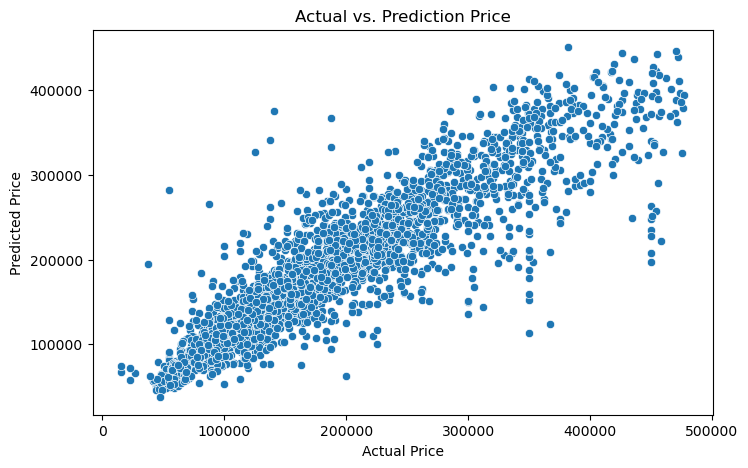

In [226]:
plt.figure(figsize=(8, 5))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');


- berdasarkan grafik diatas. dapat dilihat bahwa performa model sudah baik karena secara umum dapat memprediksi harga yang mendekati harga aktualnya. namun juga terdapat harga aktual rendah tetapi di prediksi sangat tinggi(overestimate) dan harga aktual yang tinggi tetapi di prediksi rendah(underestimate). nilai MAPE yang diperoleh yaitu 16.1% sehingga dapat di kategorikan sebagai good forecast (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*


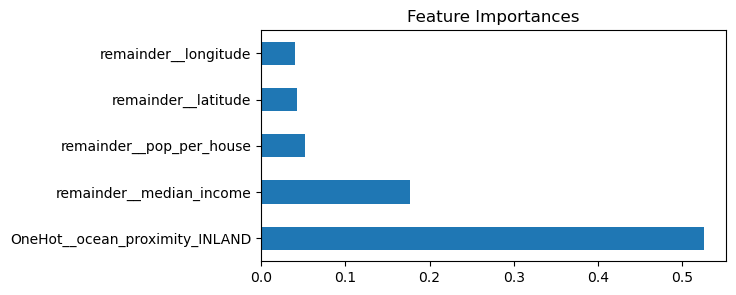

In [167]:
# Plot feature importances
plt.figure(figsize=(6,3))
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

# Conclusion

- berdasarkan pemodelan yang sudah dilakukan, fitur __'ocean_proximity'__ dan __'median_income'__ merupakan fitur yang paling berpengaruh terhadap __'median_house_value'__
  
- Metrik evaluasi yang digunakan adalah MAE, MAPE dan RMSE. score MAE ==> 27738.31 dan MAPE ==> 16.1%, sehingga kita dapat menyimpulkan bahwa prediksi harga rata-rata model akan meleset sekitar 16% atau 27738.31 USD dari harga yang seharusnya. model yang dibuat ini digunakan untuk memprediksi harga properti/rumah yang ada di california tetapi memiliki limitasi yang mana model hanya bisa memprediksi __'median_house_value'__ pada rentang 14.999 hingga 480275.0 USD. 
  
- tetapi tidak menutup kemungkinan juga prediksi model meleset lebih jauh dari nilai aktual nya baik itu overestimation maupun underestimation. hal ini dikarenakan terbatasnya fitur yang terdapat pada dataset sehingga model hanya memiliki sedikit informasi penting yang dapat membantu menjelaskan nilai target.

# Recommendation

### untuk dataset: 
- hanya ada sedikit fitur yang berkorelasi tinggi pada target, maka dari itu perlu ditambahkan beberapa fitur seperti __luas bangunan__, __luas tanah__, __fasilitas rumah__, dan jarak perumahan ke fasilitas umum (__pusat kota__, __bandara__, __mall__ dan lain-lain)
- dataset ini merupakan informasi dari sensus California tahun 1990. untuk memprediksi harga perumahan untuk saat ini dibutuhkan data yang lebih update. karena dataset sudah berusia 34 tahun yang pastinya harga perumahan sudah terkena dampak inflasi

### untuk model machine learning: 
- tuning menggunakan __GridSearch__ kamudian hyperparameter optimization menggunakan __Optuna__ atau __Bayesian Optimization__ untuk proses optimasi lebih cepat dan efisien

### untuk developer: 
- untuk keuntungan yang maksimal, developer perlu mempertimbangkan lokasi pembangunan rumah. semakin dekat lokasi rumah/properti dengan laut maka semakin tinggi harga rumah/properti tersebut.

# Save model

In [195]:
# Save Model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('California_housing_price_XGB.sav', 'wb'))

In [199]:
# Load model
filename = 'California_housing_price_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [203]:
eval = np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))